# **A Brief History of Neural Networks**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=18 -tfs=18 -ofs=18 -dfs=18
````
And for viewing this notebook on your own computer (smaller font size):
````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14 -dfs=14
````

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

---

## 1. McCulloch & Pitts - The Beginning of Artificial Neural Networks

---

The modern story of **deep learning** really picks up in the early 1940s when neurophysiologist Warren McCulloch and the brilliant logician Walter Pitts began working on mathematical models of the neurons that make up our brains. 

![](../graphics/mcculloch_and_pitts-01.png)

The model neuron they came up with looks something like this:

![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

where $\mathbf{w}$ is a vector of real-valued weights, $\mathbf{w} \cdot \mathbf{x}$ is the dot product $\sum_{i=1}^m w_i x_i$, where $m$ is the number of inputs and $b$ is the ''bias''. In words, we take in a set numbers, we’ll call these x, multiply each of the numbers by a corresponding weight, w, adds up all the results, and checks if the results are greater than some threshold $(b)$. If the result is greater than the threshold, the neuron outputs a value of one, otherwise, the neuron outputs a value of zero. Let's make sure this equation makes sense.

![](../graphics/NNQ1-01.png)

---

![](../graphics/mcculloch_pitts_nueron-01.png)

- Here's a common way to represent Mculloch-Pitts Nueron Models. 
- It's worth spending some time making sure we understand how these guys work, becuase remarkably, cutting-edge computer vision systems today use **very similar** models of neurons.

---

![](../graphics/NNQ3-01.png)

## 2. Frank Rosenblatt & The Perceptron

---

- McCulloch and Pitts showed that sets of these nueron models connected in various ways could perform various complex operations.
- They did not, however, posit an explanation for **how brains learn.**
- Six years after McCulloch and Pitts published these results in [A LOGICAL CALCULUS OF THE IDEAS IMMANENT IN NERVOUS ACTIVITY](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf), Donold O. Hebb suggested how these models could learn. 
- Hebb proposed that the weights of connections between our neurons change as we learn - specifically that the conductivity of brain synapses changed [over time as it was activated by other neurons](https://en.wikipedia.org/wiki/Hebbian_theory). 

![](../graphics/spacer_small.png)

---

![](../graphics/rosenblatt-01.png)

- In the mid 1950s at Cornell's Aeronautical Labratory, Frank Rosenblatt developed an algorithmic approach to training McCulloch+Pitts style networks to perform useful tasks.
- He first implemented his algorithm on an IBM 704 computer, and then built a physical machine, **The Perceptron**, to implement his algorithm.
- Let's see how Rosenblatt's algorithm works.
- We're talking about computer vision, so the data we really want to work with here are **images**. However, to get a sense for how the perceptron algorithm works, we'll start with much simpler data. 
- We need at least hundreds of numbers to represent an image, but the perceptron algorithm will make more sense if we start with examples that are represented by just 2 numbers, instead of hundreds. After we make sense of this 2-dimensional case, we'll apply the perceptron algorithm (as Rosenblatt did) to 20x20 pixel images. 
- This example is borrowed from Leslie Valliant's outstanding book, [Probably Approximately Correct](https://www.amazon.com/Probably-Approximately-Correct-Algorithms-Prospering/dp/0465032710), pages 44-49.

In [1]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
#Some training data for us to play with
X = np.array([[4, 1],
              [1, 2],
              [5, 1],
              [3, 2],
              [5, 2],
              [4, 3]])

#Labels
y = np.array([1, 0, 1, 0, 1, 0])

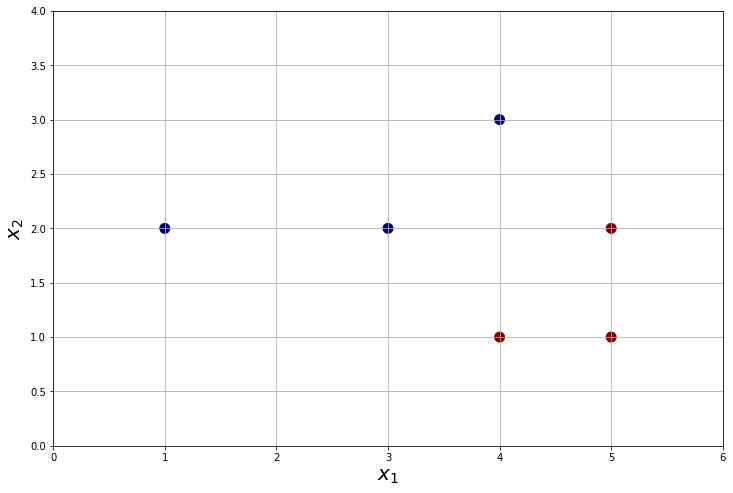

In [5]:
fig = figure(0, (12,8))
scatter(X[:,0], X[:,1], c = y, s = 100, cmap='jet')
xlabel('$x_1$', fontsize = 20)
ylabel('$x_2$', fontsize = 20)
xlim([0, 6]); ylim([0, 4])
grid(1)

- So instead of starting by using Rosenblatt's perceptron algorithm to do something like tell the difference between cats and dogs, we'll first use it to tell the difference between the purple and yellow sets of points above, where all we know about the points are their $x_1$ and $x_2$ values. 
- Now, let's see how Frank Rosenblatt's perceptron machine would learn to classify this data. Remember that our neuron model from McCulloch + Pitts: 

![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$

In our 2 dimensional case this would be:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + b > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- So our goal here then is then to choose $w_1$ and $w_2$ such that $w_1 x_1 + w_2 x_2 + b > 0$ for our positive examples, and $w_1 x_1 + w_2 x_2 + b < 0$ for our negative examples. 
- First, let's make a bit of a variable change. 
- It will be easier to get Rosenblatt's equation working if $b=0$. 
- We can achieve this, without losing any generality, by swapping our 2d problem for a 3d problem, where we append a 1 to each of our examples, like this:

In [6]:
#Careful, just run this once!
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [8]:
X

array([[4., 1., 1.],
       [1., 2., 1.],
       [5., 1., 1.],
       [3., 2., 1.],
       [5., 2., 1.],
       [4., 3., 1.]])

- So, we've appended a 1 to each of our examples, and are now going to try to solve this (equivalent) equation instead:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + w_3 x_3 > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- Where $b = w_3$.
- Can you see *why* this equation is equivalent to our original 2-d case?
- From here, the perceptron algorithm is simple! 
- First, let's write a quick method to wrap up our neuron model:

In [9]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

- Next, we'll initialize our model with weights of zero:

In [10]:
w = np.zeros(3)

In [12]:
w

array([0., 0., 0.])

- Then we'll iterate through our examples one at a time:

In [13]:
i = 0
X[i, :]

array([4., 1., 1.])

- For each example, check if our classification is correct:

In [14]:
y[i]

1

In [15]:
neuron(X[i, :], w)

False

- In this case, our classification was incorrect. The idea behind Rosenblatt's perceptron algorithm is to update our weights to make our nueron more likely to correctly classify our example next time. The output of $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too small in this case. The Perceptron algorithm tells us to increase the weights by adding the our example values to our weights, like this:

In [16]:
w = w + X[i, :]

In [17]:
w

array([4., 1., 1.])

- Let's move on to our next example: 

In [18]:
i = 1
X[i, :]

array([1., 2., 1.])

In [19]:
y[i]

0

In [20]:
neuron(X[i, :], w)

True

**Wrong again!** But this time $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too large! As you may have guessed, we need to update our weights by subtracting our example values. 

In [21]:
w = w - X[i, :]

In [22]:
w

array([ 3., -1.,  0.])

Let's check out one more example:

In [23]:
i = 2
X[i, :]

array([5., 1., 1.])

In [24]:
y[i]

1

In [25]:
neuron(X[i, :], w)

True

- This one worked! When our neuron is correct, the perceptron algorithm tells us to to leave our weights alone.
- Alright, let's put this all together into the perceptron algorithm!
- It would be cool to visualize our performance as we go, so let's write a few functions to help:

In [26]:
def update_nueron(w, x, label):
    '''Update McCulloch + Pitts Nueron using Rosenblatt's Perceptron Algorithms
       w = neuron weights, x = (n dimensional numpy array example), label = binary label'''
    
    if neuron(x, w) == 0 and label == 1:
        w = w + x
        print('incorrect!, New weights = ' + str(w))

    elif neuron(x, w) == 1 and label == 0:
        w = w - x
        print('incorrect!, New weights = ' + str(w))

    else:
        print('correct!')  
    
    return w

- It will be **even cooler** if we can visualize our decision boundary as the algorithm advances.

In [27]:
def plot_decision_boundary(X, y, w, i):
    x1s = np.arange(7)
    x2s = (-w[2]-w[0]*x1s)/w[1]

    fig = figure(0, (12,8))
    scatter(X[:,0], X[:,1], c = y, s = 75) #Scatter data
    scatter(X[i,0], X[i,1], c = 'r', s = 75)
    plot(x1s, x2s)#Plot decision boundary

    xlabel('$x_1$', fontsize = 20)
    ylabel('$x_2$', fontsize = 20)
    grid(1)

In [28]:
#Initialize Weights to zero:
w = np.zeros(3)

#Start on 0th example:
i = 0

correct!


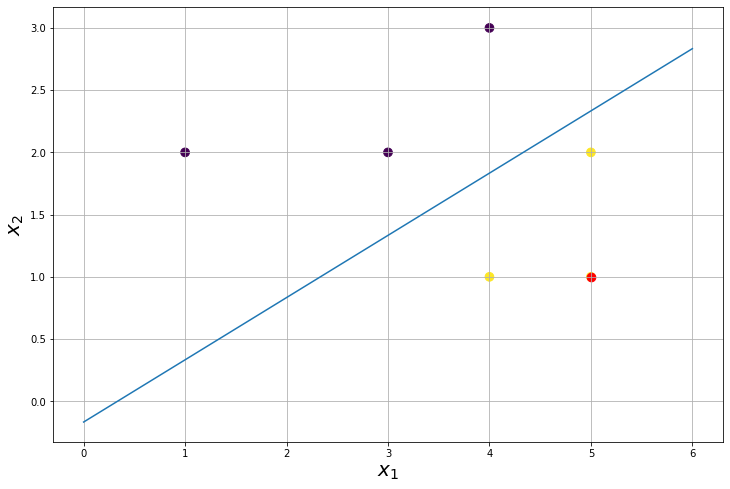

In [43]:
#Run this cell multiple times to iterate through perceptron algorithm.
w = update_nueron(w, X[i, :], y[i])

#plot decision boundary and examples
plot_decision_boundary(X, y, w, i)

#Increment counter, startover when we reach the end of examples
i = (i+1)%X.shape[0] 

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

- If we run our algorithm long enough...something pretty cool happens!
- Eventually, it arrives at a set of weights that get all of our example right!
- So, in this example, our perceptron algorithm **learned** a set of weights for our McCulloch + Pitts nueron that correctly classified all our examples! Here they are:

In [44]:
w

array([ 3., -6., -1.])

In summary, here's what we did:

| True Value |   Example    | Classification by <br> Previous Hypothesis | Hypothesis After Updating| 
|:-------:|:-------:|:-------:|:-----------:|
| - |    -      | - | $0x_1+0x_2+0x_3>0$|
| 1 | [4, 1, 1] | 0 | $4x_1+1x_2+1x_3>0$|
| 0 | [1, 2, 1] | 1 | $3x_1-1x_2+0x_3>0$|
| 1 | [5, 1, 1] | 1 | $3x_1-1x_2-0x_3>0$|
| 0 | [3, 2, 1] | 1 | $0x_1-3x_2+1x_3>0$|
| 1 | [5, 2, 1] | 0 | $5x_1-1x_2-0x_3>0$|
| 0 | [4, 3, 1] | 1 | $1x_1-4x_2+1x_3>0$|
| 1 | [4, 1, 1] | 0 | $5x_1+3x_2+0x_3>0$|
| 0 | [1, 2, 1] | 0 | $5x_1+3x_2+0x_3>0$|
| 1 | [5, 1, 1] | 1 | $5x_1-3x_2+0x_3>0$|
| 0 | [3, 2, 1] | 1 | $2x_1-5x_2+1x_3>0$|
| 1 | [5, 2, 1] | 0 | $7x_1-3x_2-0x_3>0$|
| 0 | [4, 3, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 1 | [4, 1, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 0 | [1, 2, 1] | 0 | $3x_1-6x_2-1x_3>0$|
| 1 | [5, 1, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 0 | [3, 2, 1] | 1 | $3x_1-6x_2-1x_3>0$|
| 1 | [5, 2, 1] | 0 | $3x_1-6x_2-1x_3>0$|
| 0 | [4, 3, 1] | 1 | $3x_1-6x_2-1x_3>0$|

Now, that was a pretty easy example! What about these cases:

---

![](../graphics/NNQ4-01.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# Let's Find Out!

![](../graphics/perceptron_1.gif)

*"The interesting fact about the perceptron algorithm is that, in spite of our lack of control over its exact fate as we let it loose on arbitrary data, it nonetheless manages to acheive something quite remarkable. The most basic statement of the power of this algorithm, proved by Albert Novikoff soon after the algorithm was first proposed, is that if there is a true linear seperator, then the algrorithm is sure to find it, or another hypothesis that also correctly classifies all the examples, after having made misclassifications only a finite number of times."*
- Leslie Valliant in Probably Approximately Correct, p. 47

---

## If a linear seperator exists, Rosenblatt's Perceptron will find it!
- The [upper bound found by Albert Novikoff](https://cs.uwaterloo.ca/~y328yu/classics/novikoff.pdf) is $M/n^2$, where $M$ is the square of the distance of the furthest data point in the training set from the origin, and m is the margin. The margin is the minimum distance of any data point from the seperating line for which the line this distance is largest. 
- This is a remarkable result!
- Importantly, this is true for not just 2 dimensional data, but **data of any dimension!**
- *"Learning is achieved in many steps that are plausible but unnocuous when viewed one by one in isolation. These steps work becuase there is an overall algorithmic plan. In combination the steps achieve something, in particular, some kind of convergence."*
    - Leslie Valliant in Probably Approximately Correct, p. 49


![](../graphics/spacer_small.png)

## But Can Perceptrons Learn to Recognize Images?!

---

- So we've seen that Rosenblatt's Perceptron can learn the appropriate weights for a McCulloch and Pitts style nueron for toy 2-dimensional data, but what about real images?!
- Before we dive in, let's make sure that the connection between our toy problem and classifing images is clear.

![](../graphics/images_are_points-01.png)

---

- Rosenblatt's perceptron machine had an array of 400 photocells, (probably?) arranged in a 20x20 grid.
- Here's a figure from this [Principles of NeuroDynamics](http://www.dtic.mil/dtic/tr/fulltext/u2/256582.pdf):

![](../graphics/rosenblatts_perceptron.png)

Before we dive in, what do you think?

---

![](../graphics/NNQ7-01.png)

---

## Step 0

- Alright, let's break this one down a bit.
- We'll go one iteration at a time, and watch how our weights update as perceptron algorithm "learns".
- We'll outline the example that we're currently "learning from", green means that the current output of our McCulloch and Pitts neuron matches our label, red means our output is incorrect.
- Notice that our weights don't change when our neuron is correct, why?
- What does the bottom right plot show? What is it's dimension?

![](../graphics/perceptron_step_1.png)

---

## Step 1

![](../graphics/perceptron_step_2.png)

---

## Step 2

![](../graphics/perceptron_step_3.png)

---

## Step 3

![](../graphics/perceptron_step_4.png)

---

## Step 4

![](../graphics/perceptron_step_5.png)

---

### Now let's check out the first 10 steps all together.

![](../graphics/spacer_small.png)

![](../graphics/perceptrons_5.gif)

- Now, the big question - if we let this run for more iterations **do you think it will be able to perfectly classify our data?**
- Ready to find out?

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/perceptrons_4.gif)

# Rosenblatt's Perceptron Wins!

- Incredible, right?
- Now, a good follow up question would be **how does this do out of sample? Is it actually learning or just memorizing?**
- On a held out test set of 6 examples, across ten trials, Rosenblatt's perceptron acheived these accuracies: 4/6, 4/6, 4/6, 6/6, 6/6, 6/6, 5/6, 5/6, 5/6, 6/6. 
- Results are different becuase I'm randomizing the order we feed example into the algroithm. 
- This makes for an average out of sample accuracy of **85%**. Not bad!

---

# And how did the world respond?

![](../graphics/perceptron_hype-01.png)

---

![](../graphics/spacer_small.png)

## Was Rosenblatt Right?
- Clearly, the New York Times article in exaggerated (might remind you of some AI hype we see today)
- It's really interesting that Rosenblatt had **no idea** what this technology would be used for - this is often true of new technologies, it's immediately clear how impactful they may (or may not!) be.
- What about the cat vs dog thing? Is that true?
- Let's find out!

In [2]:
#We'll use the fastai library to quickly download a cat + dog image dataset. 
from fastai.vision import *
import cv2
from tqdm import tqdm
from matplotlib.pyplot import *
from IPython import display

In [3]:
#Download data using fastai library
path = untar_data(URLs.DOGS)

In [4]:
#Get paths to images
dogs_paths = sorted((path/'train/dogs/').glob('*.jpg'))
cat_paths = sorted((path/'train/cats/').glob('*.jpg'))

In [5]:
sz = 64 #Resize images to (64x64)
num_examples_per_class = 2500 #Let's up the ante here and use a fairly large number of examples

In [6]:
#Put images in big array we'll call X, just like our previous perceptron examples
X = np.zeros((num_examples_per_class*2, sz**2), dtype = 'uint8') #Empty array
for i in tqdm(range(num_examples_per_class)):
    im = cv2.imread(str(dogs_paths[i]))
    X[i, :] = cv2.resize(np.mean(im, axis = 2), (sz, sz)).ravel()

for i in tqdm(range(num_examples_per_class)):
    im = cv2.imread(str(cat_paths[i]))
    X[num_examples_per_class+i, :] = cv2.resize(np.mean(im, axis = 2), (sz, sz)).ravel()
    
#Make label vector, 0 for dog, 1 for cat. 
y = np.zeros((2*num_examples_per_class), dtype ='int')
y[num_examples_per_class:] = 1

100%|██████████| 2500/2500 [00:15<00:00, 156.72it/s]


In [7]:
#Randomize X, y
rand_vec = np.arange(2*num_examples_per_class)
np.random.shuffle(rand_vec)
X, y = X[rand_vec, :], y[rand_vec]

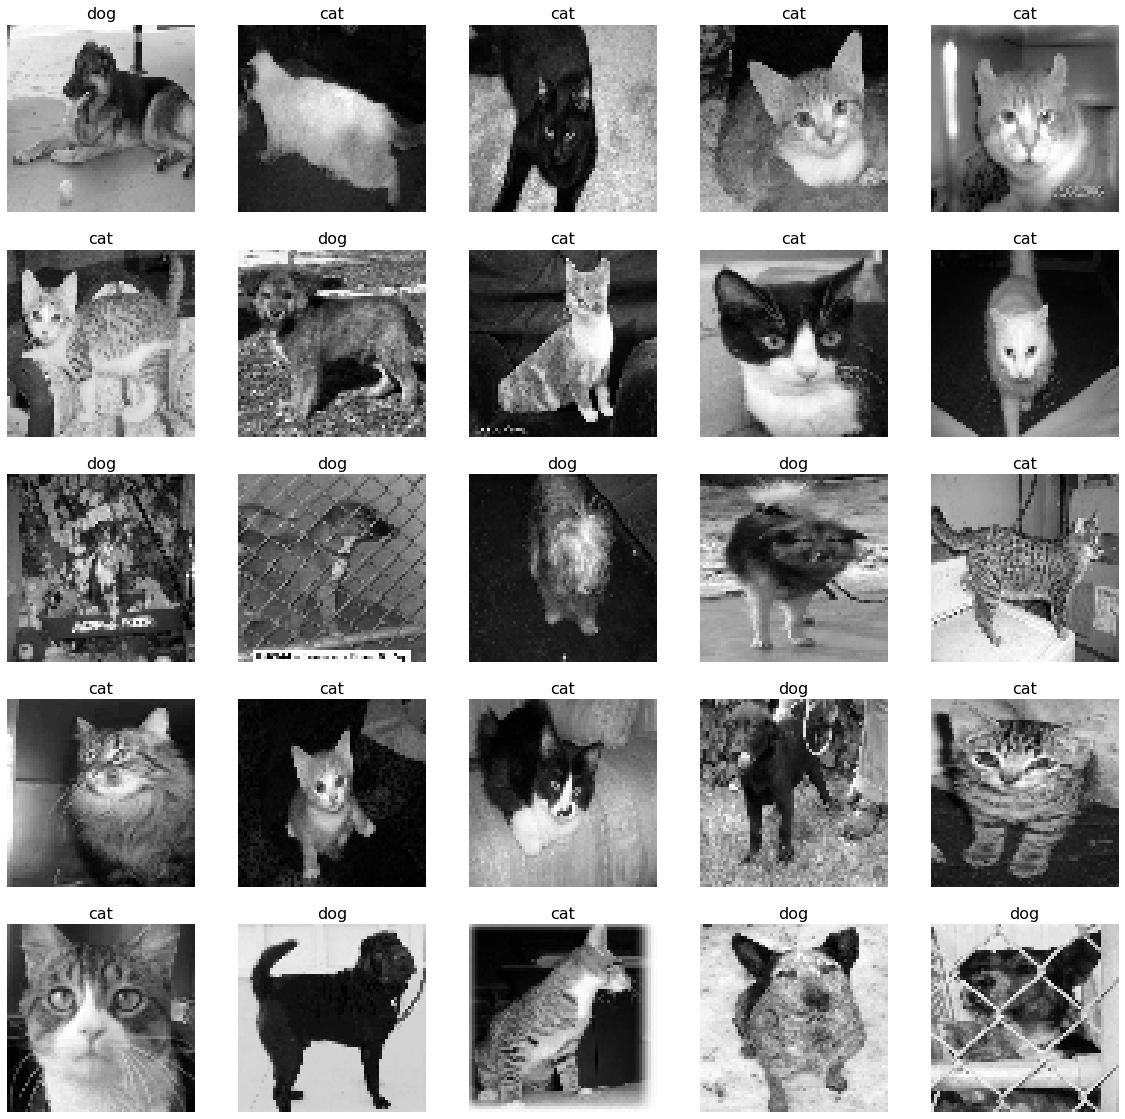

In [8]:
#Visualize data
labels = {0:'dog', 1:'cat'}
fig = figure(0, (20, 20))
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    imshow(X[i, :].reshape(sz, sz), cmap = 'gray')
    title(labels[y[i]], fontsize = 16); axis('off')

In [9]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

def update_nueron(w, x, label):
    '''
    Update McCulloch + Pitts Nueron using Rosenblatt's Perceptron Algorithms
    w = neuron weights, x = (n dimensional numpy array example), label = binary label
    '''
    is_correct = False
    if neuron(x, w) == 0 and label == 1:
        w = w + x
    elif neuron(x, w) == 1 and label == 0:
        w = w - x
    else:
        is_correct = True
    
    return w, is_correct

X = np.hstack((X, np.ones((X.shape[0], 1)))) #Pad data with ones. 

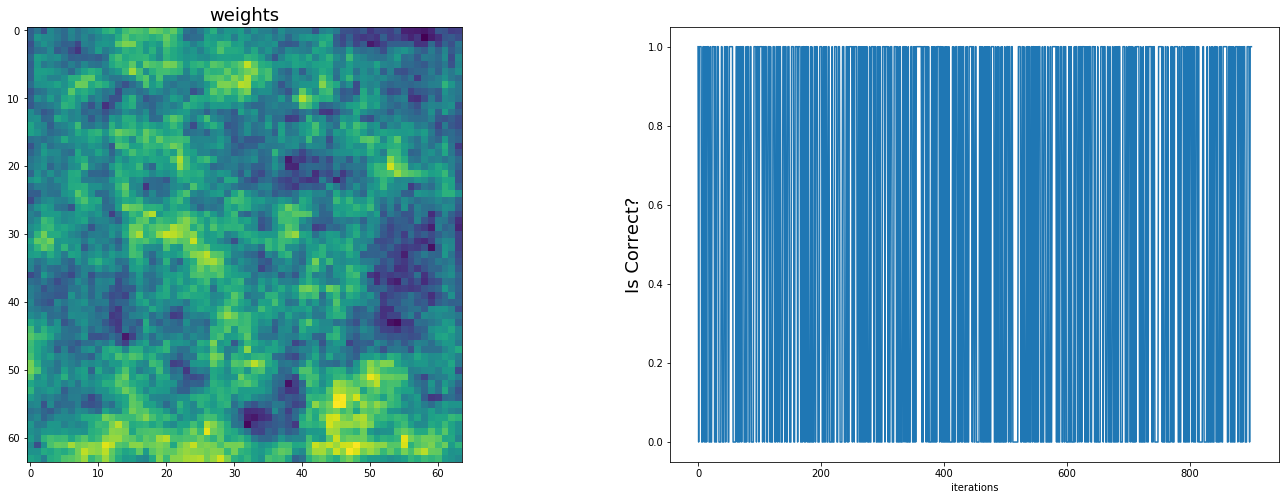

<Figure size 432x288 with 0 Axes>

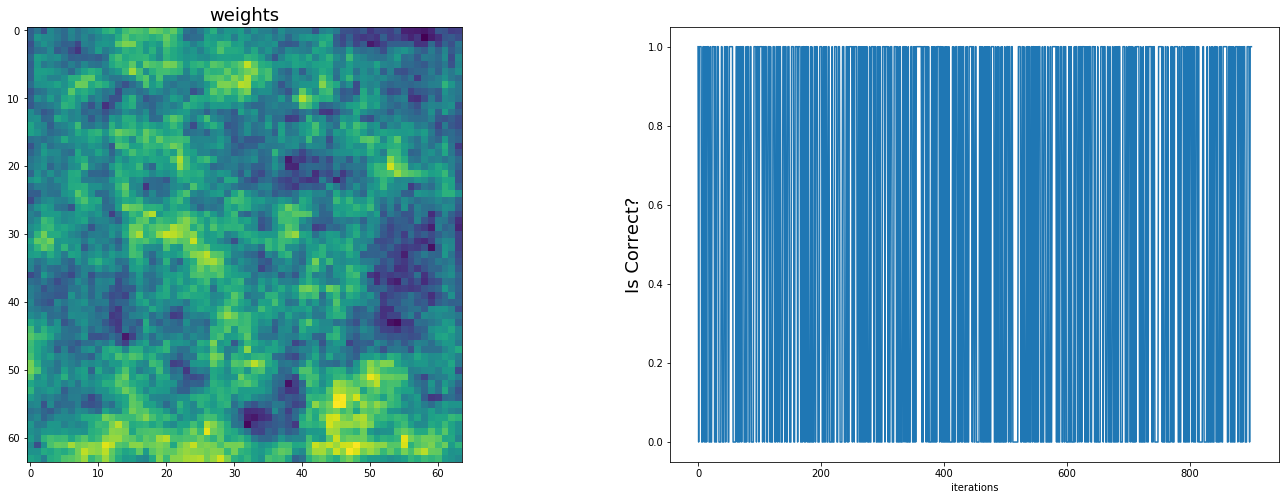

In [10]:
iterations = 1000 #Use more iterations here and see if you get a different result!
w = np.zeros(X.shape[1])
display_frequency = 100
results = []

for i in range(iterations):
    w, is_correct = update_nueron(w, X[i%X.shape[0], :], y[i%X.shape[0]])    
    results.append(is_correct)
    if i%display_frequency==0:
        clf(); fig = figure(0, (24, 8))
        fig.add_subplot(1,2,1)
        imshow(w[:-1].reshape(sz, sz)); title('weights', fontsize = 18)
        fig.add_subplot(1,2,2)
        plot(results); ylabel('Is Correct?', fontsize = 18); xlabel('iterations')
        display.clear_output(wait=True); display.display(gcf())

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# So, no. The perceptron algorithm cannot tell the difference between a cat and dog.

- So, based on our experiment here, Rosenblatt was wrong. 
- **Sidenote on VC Dimension** - I chose the number of examples rather intentionally here. The Perceptron has a VC-dimension of the dimension of the input data plus one - what this means of us is that the perceptron can find a hyperplane that perfectly divides *any set* of examples, as long as we have fewer examples than the dimension of the input data plus one. Here, we're using images of size 64 by 64, so the input dimension of our data is 4096. So if we use less than 4097 examples, our perceptron will be able to perfectly divide our cats from dogs, given enough iterations. Now, just becuase our perceptron finds a hyperplane that does divide our examples (for example we could easily do this with one example of each class), does not mean that it's really learned the concept of cats vs dogs - we could test this by testing our perceptron on images outside the training set. This is a big theme in machine learning that we'll spend a lot of time on in this course. For a great intro to VC dimension, check out [Learning From Data](https://work.caltech.edu/telecourse.html) from Caltec.

![](../graphics/spacer_small.png)

## 3. Misky & Papert Throw Some Shade

---

- A few years later it became apparent that the Perceptron did have limitations. For example, it could differentiate between typed alphabetical letters, but error rate increased by 21% when the font changed. [ref p103](https://www.amazon.com/Ai-Tumultuous-History-Artificial-Intelligence/dp/0465029973).
- However Rosenblatt's work did kick of lots of interesting work in the 1960s in neural netowrks including Wilfrid K. Taylor's "Taylor Net", Bernard Widrow and M. E. Hoff's Adeline and Madeline, and Karl Steinbuch's learning matrix. [ref p105](https://www.amazon.com/Ai-Tumultuous-History-Artificial-Intelligence/dp/0465029973).
- And then, in 1969, Marvin Minsky and Seymour Papert of MIT published a book entitled Perceptrons:

![](../graphics/perceptrons_book-01.png)

- Minsky and Papert showed using analytical techniques some of the strenghts and many of limitations of perceptrons. 
- "...However, [in 1966] we were now involved in establishing at M.I.T. an artificial intelligence labratory largely devoted to real "seeing machines," and gave no attention to perceptrons until we were jolted by attending an I.E.E.E. Workshop on Patter Recognition in Peurto Rico early in 1967. Appalled at the persistent influence of perceptrons (and similar ways of thinking) on *practical pattern recognition*, we determined to set out our work as a book. Slightly ironically, the first results obtained in our new phase of interest were the psuedo-positive applications of stratification." - Perceptrons, page 242
- We saw perceptrons fail on cats vs dogs, and here's a few simple examples in 2d where perceptrons fail:

![](../graphics/perceptrons_3.gif)

- Misky and Papert cover lots more complex examples than the simple ones above. 
- The book had a big impact: "Such was the authority of Minsky and Papert at that time that the book brought neural-network reserach in the United States to a virtual halt." [ref p106](https://www.amazon.com/Ai-Tumultuous-History-Artificial-Intelligence/dp/0465029973)
- Minsky refutes this: "One popular version is that the publication of our book so discouraged reserach on learning in network machines that a promising line of research was interupted. Our version is that progress had already come to a virual halt becuase of the lack of adequate basic theories, and the lessons of this book provided the field with new momentum - albeit, paradoxically, by redirecting it's immediate concerns. To understand the situation, one must recall that by the mid 1960s there had been a great many experiments with perceptrons, but no one had been able to explain why they were able to learn to recognize certain kinds of patterns, but not others." - Marvin Minsky, 1988 reprint of "Perceptrons", p xii



### Did "Perceptrons" Kill Neural Network Reseach for 15 years?

- I'll let you be the final judge of that. A few thoughts I have briefly: 
1. After reading parts of Perceptrons, I don't think Minsky and Papert were trying to malicious. As we just saw, the field really did need some "hype busting".
2. It does appear that neural network research did slow down in the 1970s, however it's hard to say how much this was a result of the book. 

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

## 4. Hinton & Rumelhart Make Neural Networks Sexy Again

---

- One limitation of Rosenblatt's Perceptron learning algorithm was that **it only worked for networks that were one neuron deep.**
- In 1986, Rumelhard, Hinton, and Williams showed in a Nature Letter, showed a method, backpropogation, that could be used to train multi layer neural networks. 
- The idea was not necessary unique to or invented by Rumelhard, Hinton, and Williams, but their work and this publication kicked off new reserach into neural networks. 

![](../graphics/rumerlhart_hinton-01.png)

- Backpropgation of errrors remains a critical technique today, we'll cover backpropogation in detail in this course. 

## So, can a 1980s mulitlayer perceptron (MLP) solve Cats vs Dogs?

- Let's implement a 1980's style MLP in [Pytorch](https://pytorch.org/).
- This will go faster on GPU. 

In [11]:
import torch
import torch.nn as nn
import matplotlib.gridspec as gridspec

In [12]:
#Check if we have a GPU:
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

In [13]:
class Net(nn.Module):
    '''Simple 2 layer 1980s style fully connected neural network.'''
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(sz*sz, 16)  #16 hidden units
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return self.fc2(x)

In [14]:
#Setup network, inputs and outputs. 
N = Net().to(device)
X_tensor = torch.tensor(X[:, :-1]/255., dtype = torch.float32)
y_tensor = torch.tensor(y)

X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)

In [15]:
#Setup loss function and optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(N.parameters(), lr = 1e-2)

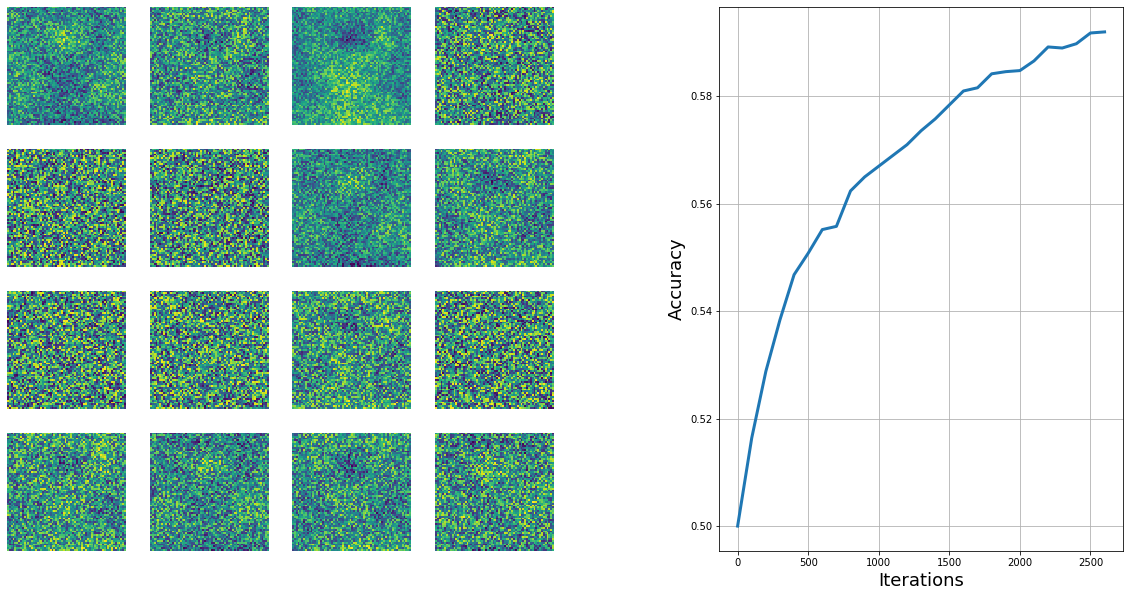

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

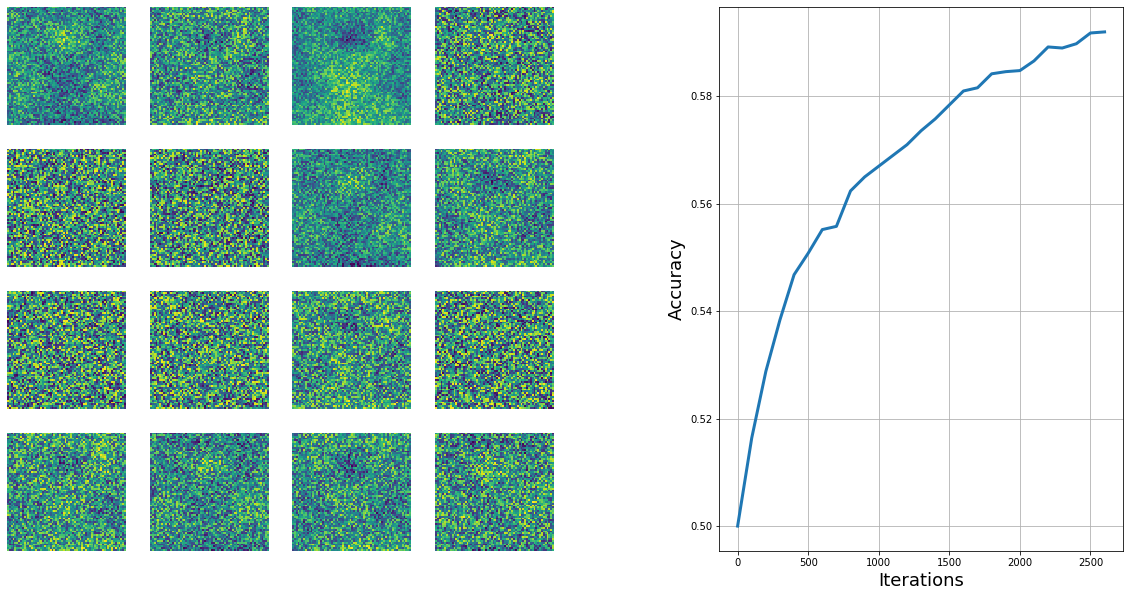

In [16]:
iterations, vis_freq = 3000, 100
results = [[], []]

for i in range(iterations):
    optimizer.zero_grad() # zero the parameter gradients
    yhat = N(X_tensor) #Forward pass
    loss = criterion(yhat, y_tensor) #Compute loss
    loss.backward() #Backpropogation in one line!
    optimizer.step() #Take step "down hill"
    
    if i%vis_freq == 0:
        with torch.no_grad():
            predicted_labels = torch.argmax(nn.Softmax(dim = 1)(yhat), dim = 1)
            accuracy = y_tensor.eq(predicted_labels).sum(dtype = torch.float)/len(y_tensor)
        results[0].append(i); results[1].append(accuracy.numpy())
        weights = N.fc1.weight.detach().cpu().numpy()
        clf(); fig = figure(0, (20, 10)); gs = gridspec.GridSpec(4, 8)
        for i in range(16):
            fig.add_subplot(gs[i//4, i%4])
            imshow(weights[i, :].reshape(sz, sz)); axis('off')
        fig.add_subplot(gs[:, 5:])
        plot(results[0], results[1], linewidth = 3); grid(1)
        xlabel('Iterations', fontsize=18); ylabel('Accuracy', fontsize=18); display.clear_output(wait=True); display.display(gcf())

---

## Dogs vs Cats was still not quite feasible in the 1980s



- The backpropogation algorithm is a critical part of modern systems, but there's a few other pieces we need to really be able to solve Dogs vs. Cats. 
- Interestingly, multilayer perceptrons trained with backpropogation did deliver terrific results for other problems in the 1980s, such as **autonomous driving**.

![](../graphics/NAVLAB_B.gif)

---

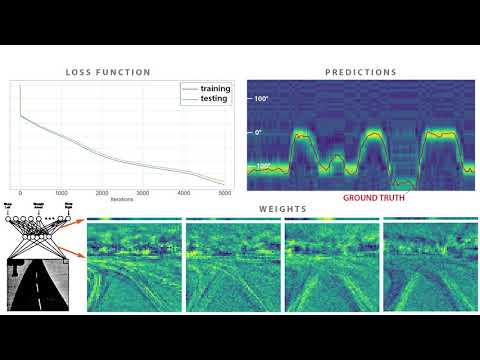

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('viCZNZvcT2g', width = 1280, height=720)

- I have a [video series](https://www.youtube.com/watch?v=cExJbbwOfcw) on this if you're interested in learning more.  

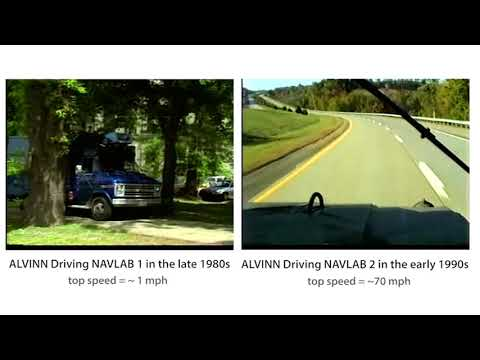

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('1ClFWfaV0CU', width = 1280, height=720)

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

## 5. Yann Lecun Mostly Solves the Problem in the Late 90s but No One Realizes It

---

![](../graphics/lenet-5-01.png)

- In the late 1990s, Yann Lecun successfully trained a 5 layer neural network (99%+ accuracy) to predict hand written digits. 
- Yann LeCun joined AT&T Bell Labs in 1988 after leaving a postdoc position on Geoff Hinton's lab at the University of Toronto. 
- LeCun's research focused on optical charecter recognition (OCR), and developed a system that was used to read 10% of all the checks in the US in the late 1990s and early 2000s. [Source](https://en.wikipedia.org/wiki/Yann_LeCun).
- His collaborators at AT&T included Leon Bottou and [Vladimir Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik).
- In 2013, Yann became the director of Facebook AI Research (FAIR). 

In [19]:
import numpy as np
from matplotlib.pyplot import *

import torch, torchvision
import torch.nn as nn

In [20]:
#Check if we have a GPU:
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

In [21]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../data', train=True, download=True, \
                               transform = torchvision.transforms.ToTensor()),
    batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:02, 4430936.40it/s]                             


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


32768it [00:00, 276055.01it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:00, 1911961.57it/s]                            
8192it [00:00, 113984.95it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [22]:
x, y = next(iter(train_loader))

In [23]:
x.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

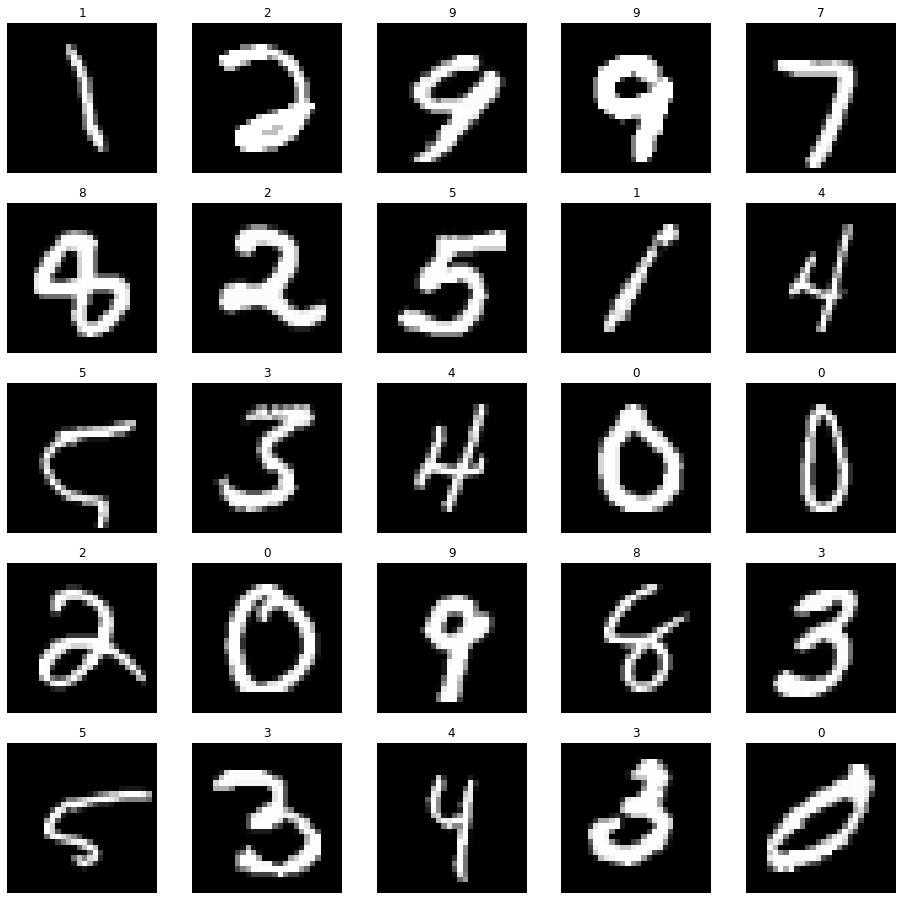

In [24]:
fig = figure(0, (16, 16))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    imshow(x[i, 0, :, :].numpy(), cmap = 'gray'); axis('off')
    title(y.numpy()[i])

In [26]:
class Net(nn.Module):
    '''Le-Net 5 implementation'''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(400, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(torch.tanh(self.conv1(x)), (2, 2))
        x = F.max_pool2d(torch.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [27]:
N = Net().to(device) #Put on the GPU if we have one

In [28]:
#Setup loss function and optimizer
import torch.optim as optim
optimizer = torch.optim.SGD(N.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [29]:
print_freq = 100
num_epochs = 5

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad() # zero the parameter gradients
        yhat = N(x) #Forward pass
        loss = criterion(yhat, y) #Compute loss
        loss.backward() #Backpropogation in one line!
        optimizer.step() #Take step "down hill"

        if i%print_freq == 0:
            yhat = N(x)
            _, predictions = torch.max(yhat, dim =1)
            acc = y.eq(predictions).sum(dtype = torch.float)/len(predictions)
            print('epoch=', str(epoch), ', loss=', loss.data.detach().cpu().numpy(), 'accuracy=', acc.cpu().detach().numpy())

/Users/stephenwelch/anaconda3/envs/dl-workshop-2/lib/python3.7/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch= 0 , loss= 2.306748 accuracy= 0.046875
epoch= 0 , loss= 2.2891154 accuracy= 0.1875
epoch= 0 , loss= 2.2839005 accuracy= 0.53125
epoch= 0 , loss= 2.2623186 accuracy= 0.484375
epoch= 0 , loss= 2.2232857 accuracy= 0.5625
epoch= 0 , loss= 2.1588776 accuracy= 0.59375
epoch= 0 , loss= 1.9314725 accuracy= 0.640625
epoch= 0 , loss= 1.8138925 accuracy= 0.390625


KeyboardInterrupt: 

![](../graphics/spacer_small.png)

- The really interesting thing about LeNet-5, besides kicking butt on hand written digits, was how much Yann Lecun got right. 
- As we'll see, today's cutting edge deep learning models are **incredibly similar** to LeNet-5. 
- One missing piece in the late 90s was large labeled datasets.

In [24]:
## In case you want to try try leNet-5 on cats vs dogs (you'll have to change the network a bit. )
# from fastai.vision import untar_data, URLs

# path = untar_data(URLs.DOGS)
# labels = {0:'cat', 1:'dog'}

# tfms = torchvision.transforms.Compose([torchvision.transforms.Resize((64, 64)), torchvision.transforms.ToTensor()])
# train_dataset = torchvision.datasets.ImageFolder(str(path/'train'), transform=tfms)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=4, shuffle=True)

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

## 6. Fei Fei Li Makes the Worlds Largest Labeled Image Dataset

---

![](../graphics/fei_fei_li-01.png)

- Beginning around 2006, Fei Fei Li, then a new professor at the University of Illinois Urbana-Champaign, began working on building the largest labeled image dataset ever constructed. [Great Article on Fei Fei Li and ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/).
- She chose to use the [WordNet lexical database](https://en.wikipedia.org/wiki/WordNet) for her class labels, and to focus on finding images for each "synset" in Wordnet. 
- Li first tried hiring undergraduate students to perform annotation, but quickly found that this appraoch simple would not achieve the scale she needed, and instead used Amazon Mechanical Turk. 
- ImageNet was first published in 2009, and quickly developed into a public computer vision competition, the ImageNet Large Scale Visual Recognition Competition (ILSVRC). 
- ILSVRC used a subset of 1000 imaget classes, and included ~1.2M training images. 

---

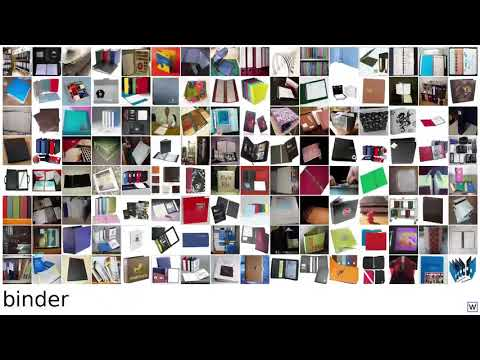

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('WO_mP-HPH4M', width = 1280, height=720)

- So, perhaps not surprisingly, ILSVRC turned out to be quite difficult. 
- The best performance achieved in 2010 was a top-5 test set error rate of **28.2%**. Top-5 means that the correct answer was one of the top five answers given by the network. 
- In 2011, the top-5 error rate dropped to **25.8%**, [achieved by a team from Xerox](http://image-net.org/challenges/LSVRC/2011/results) using SIFT and Fisher Vectors (FVs).
- And then...this happened:

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

## 7. Hinton and Krizhevsky Make Neural Networks Sexy Again...Again

---

![](../graphics/hinton_krizhevinsky-01.png)

- SuperVision, a team from the University of Toronto, led by Geoff Hinton (Remember Him?) **reduced the top-5 test set error by around 40%, down to 15.4%.**
- The model they used is today often called "AlexNet" after Alex Krizhevsky
- [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).
- Hinton's team used a deep neural network, not all that different from LeNet-5, we'll discuss what all this means later in the course: 

![](../graphics/alexnet-architecture.png)

- In the years following the release of the AlexNet paper, deep learning results have improved even further, beating humans on the imagenet dataset for the first time in 2015.

![](../graphics/imagenet_over_time-01.png)

![](../graphics/spacer_small.png)

---

## Transfer Learning = Insane

- One particularly exciting thing about the AlexNet results is how adaptable deep models are to other computer vision problems. 
- [Razavian et. al.](https://arxiv.org/pdf/1403.6382.pdf) and [Donahue et. al.](https://arxiv.org/pdf/1310.1531.pdf) show that "off-the-shelf" CNNs plus a simple linear classifier outperform existing state of the art accross many computer vision tasks. 

![](../graphics/transfer_learning.png)

![](../graphics/spacer_small.png)

## 8. Jeremy Howard Makes Building Cutting-Edge Deep Learning Systems Really Fast 

---

![](../graphics/fastai-01.png)

- Using modern deep learning models we should be able to solve our Dogs vs Cats problem.
- However, until really just the last few years, training these systems yourself has been pretty difficult. 
- Fortunately, intiatives like Jeremy Howard's (Kaggle Co-founder) fastai are making training these systems much easier.
- If you're serious about getting good at this stuff, fast.ai's MOOCs and library are terrific resources.
- Let's walkthrough our dogs vs cats problem using the fastai library.

In [31]:
from fastai.vision import *

In [32]:
#Download our data if we don't have it:
path = untar_data(URLs.DOGS)

sz = 224
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, size = sz, ds_tfms = tfms)

In [33]:
data

ImageDataBunch;

Train: LabelList (23000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /Users/stephenwelch/.fastai/data/dogscats;

Test: None

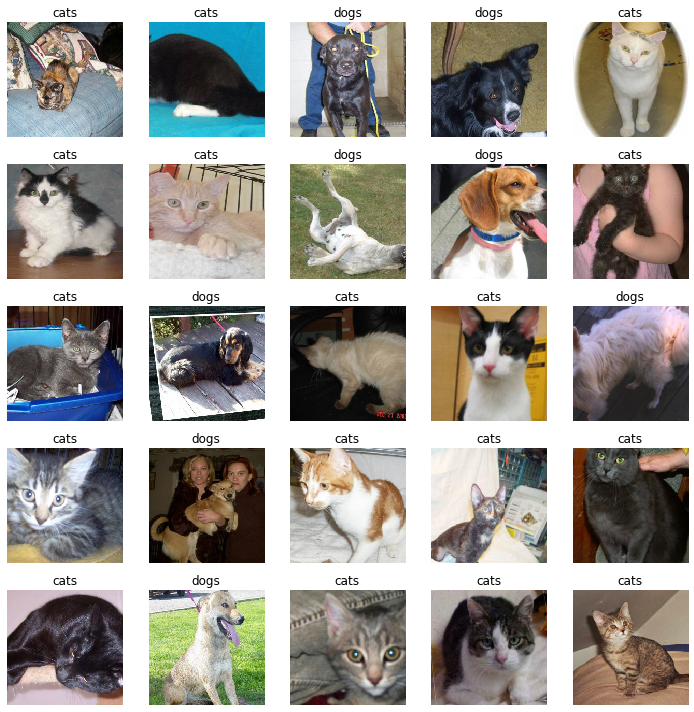

In [34]:
#fast ai has some nice built in visualization methods:
data.show_batch(rows = 5, figsize = (10, 10))

---

- We'll setup our model here. We'll use a model that was pretrained on the ImageNet dataset, and "fine tune" it on our dogs vs. cats dataset. 
- We'll use the [ResNet](https://arxiv.org/abs/1512.03385) deep learning model architecture, arguably the first classification model to deliver superhuman performance, and winner of the 2015 ILSVRC challenge. 

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained = True)

In [9]:
# Takes a couple hours to train on CPU, just a few minutes on GPU 
#learn.fit(epochs = 2, lr = 1e-2)

In [10]:
#learn.fit_one_cycle(cyc_len = 4, max_lr = 1e-2)

- This is pretty slow on CPU, you can download my pretrained model [here](http://www.welchlabs.io/unccv/intro_to_computer_vision/dogs_vs_cats.pth), just put the pth in the data directory of this repo.

In [17]:
#If we don't want to take the time to train here , we can load saved model weights from data directory
learn.model_dir = Path(os.getcwd().split('notebooks')[0])/'data'
learn.load('dogs_vs_cats');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

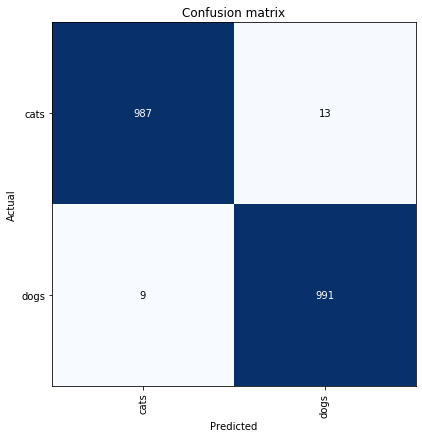

In [19]:
interp.plot_confusion_matrix(figsize = (6, 6))

In [20]:
cm = interp.confusion_matrix()
accuracy = np.sum(np.diag(cm))/np.sum(cm)
print(accuracy)

0.989


- We've achieved 98.9 accuracy on our dogs vs cats dataset!
- Remarkably, in just 2012, state of the art on this dataset was around 80%. 
- The data we're using comes from a [2013 Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats)
- The competition pushed this score up to 98.9%, basically our score above. 
- With the <10 lines of code above, we would have gotten 1st or 2nd place in this kaggle competition.
- The fastai library is still pretty early in development, but it's really enabling some incredible results with very few lines code by *incorperating best practices and cutting-edge techniques into the library*
